In [1]:

## Data Manipulation
import pandas as pd
import numpy as np
import time
from datetime import datetime
import tensorflow as tf

## Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Custom 
from elexon import ElexonRawClient
print(tf.__version__)


import IPython
import IPython.display

2.3.0


In [2]:

api = ElexonRawClient('KEY') 


# Actual Aggregated Generation per Type
#generation1 = api.Transparency.B1620(SettlementDate = '2020-01-01', Period = '5')
# Alternatively, use the general request() function by passing the endpoint in with the arguments:
#generation2 = api.request('B1620', SettlementDate = '2020-01-01', Period = '5')

In [3]:

now = datetime.now() 
now.strftime("%Y-%m-%d")

'2020-08-20'

In [5]:

start = '2020-01-01'
end = '2020-02-01'

In [6]:
dem = api.request('SYSDEM',FromDate = start, ToDate = end)

In [7]:
df_dem = pd.DataFrame(dem)

df_dem

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,demand,activeFlag
0,ITSDO,2020-01-01,1,27073.0,True
1,TSDF,2020-01-01,1,27395.0,True
2,ITSDO,2020-01-01,2,27612.0,True
3,TSDF,2020-01-01,2,28042.0,True
4,ITSDO,2020-01-01,3,27111.0,True
...,...,...,...,...,...
2995,TSDF,2020-02-01,10,24764.0,True
2996,TSDF,2020-02-01,11,25312.0,True
2997,ITSDO,2020-02-01,11,24622.0,True
2998,ITSDO,2020-02-01,12,24978.0,True


In [11]:
df_dem[df_dem['recordType']=='ITSDO']

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,demand,activeFlag
0,ITSDO,2020-01-01,1,27073.0,True
2,ITSDO,2020-01-01,2,27612.0,True
4,ITSDO,2020-01-01,3,27111.0,True
6,ITSDO,2020-01-01,4,26311.0,True
9,ITSDO,2020-01-01,5,25693.0,True
...,...,...,...,...,...
2991,ITSDO,2020-02-01,8,23931.0,True
2992,ITSDO,2020-02-01,9,23636.0,True
2994,ITSDO,2020-02-01,10,23533.0,True
2997,ITSDO,2020-02-01,11,24622.0,True


In [15]:
df_ITSDO = df_dem[df_dem['recordType']=='ITSDO']

In [16]:
df_ITSDO['startTimeOfHalfHrPeriod'].nunique()

32

In [27]:
df_dem[df_dem['recordType']=='TSDF']

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,demand,activeFlag
1,TSDF,2020-01-01,1,27395.0,True
3,TSDF,2020-01-01,2,28042.0,True
5,TSDF,2020-01-01,3,27890.0,True
7,TSDF,2020-01-01,4,27009.0,True
8,TSDF,2020-01-01,5,26332.0,True
...,...,...,...,...,...
2990,TSDF,2020-02-01,8,24867.0,True
2993,TSDF,2020-02-01,9,24804.0,True
2995,TSDF,2020-02-01,10,24764.0,True
2996,TSDF,2020-02-01,11,25312.0,True


In [28]:
df_TSDF = df_dem[df_dem['recordType']=='TSDF']

In [22]:

# Number of entries
len(df_ITSDO)

# Change to make new datetime object based on settlement period frequency (30 mins)

dates = pd.date_range(start=start,periods=len(df_ITSDO), freq='30T') 

df_ITSDO.index = dates

In [23]:
df_ITSDO

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,demand,activeFlag
2020-01-01 00:00:00,ITSDO,2020-01-01,1,27073.0,True
2020-01-01 00:30:00,ITSDO,2020-01-01,2,27612.0,True
2020-01-01 01:00:00,ITSDO,2020-01-01,3,27111.0,True
2020-01-01 01:30:00,ITSDO,2020-01-01,4,26311.0,True
2020-01-01 02:00:00,ITSDO,2020-01-01,5,25693.0,True
...,...,...,...,...,...
2020-02-01 03:30:00,ITSDO,2020-02-01,8,23931.0,True
2020-02-01 04:00:00,ITSDO,2020-02-01,9,23636.0,True
2020-02-01 04:30:00,ITSDO,2020-02-01,10,23533.0,True
2020-02-01 05:00:00,ITSDO,2020-02-01,11,24622.0,True


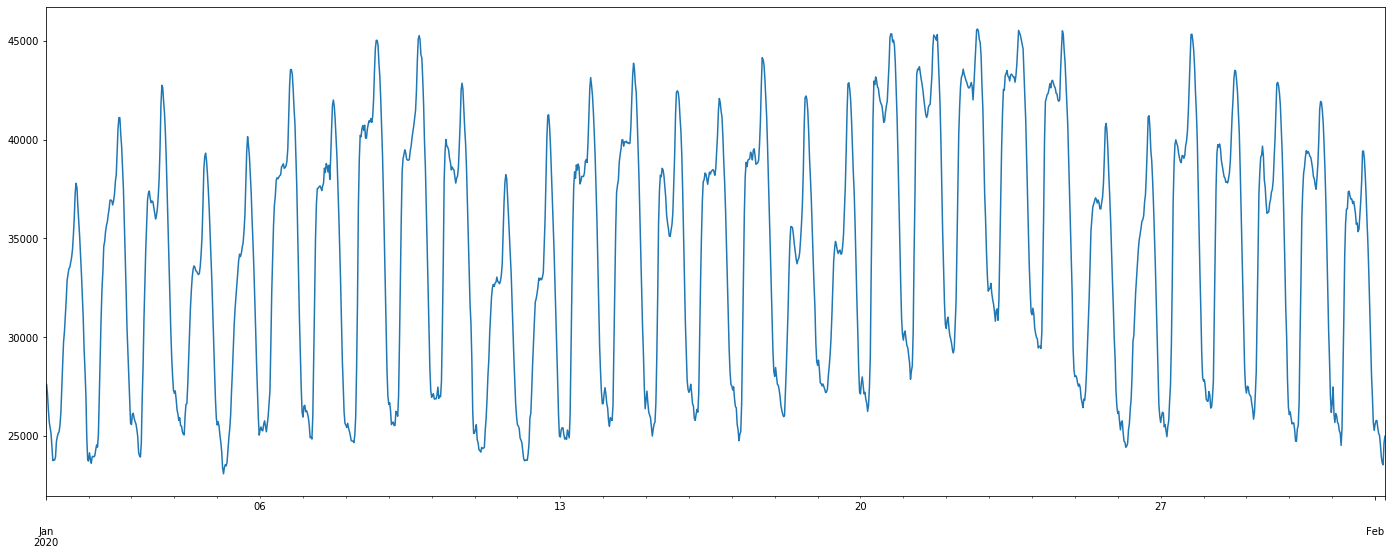

In [25]:
df_ITSDO['demand'].plot(figsize=(24,9))

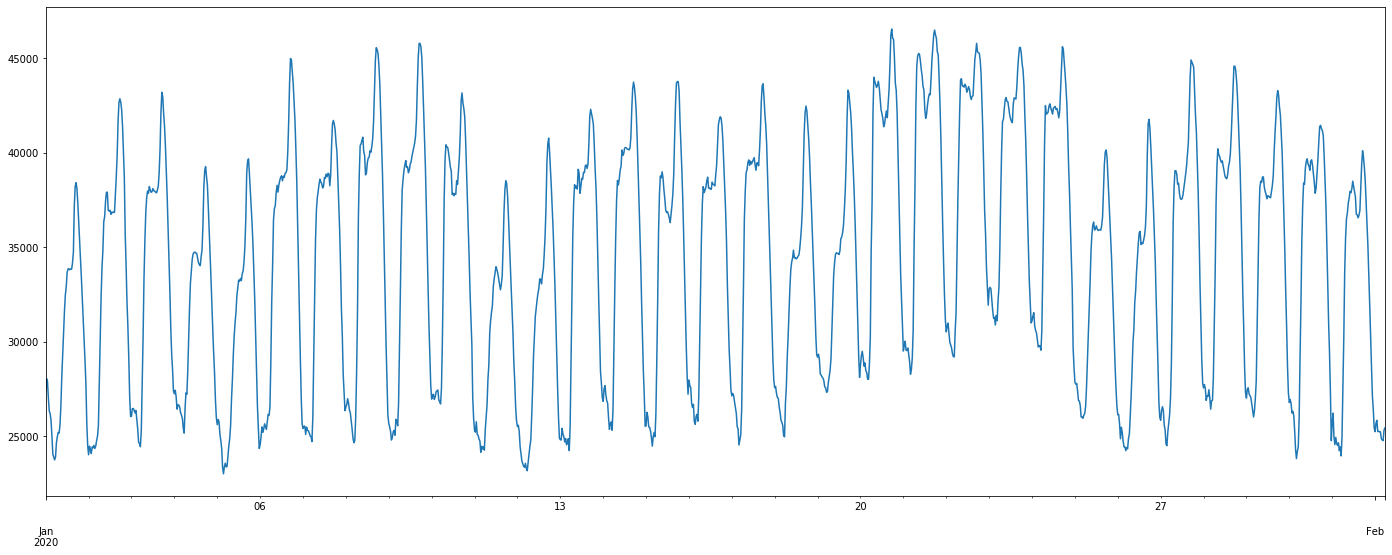

In [31]:
dates = pd.date_range(start=start,periods=len(df_TSDF), freq='30T') 

df_TSDF.index = dates
df_TSDF['demand'].plot(figsize=(24,9))

In [30]:
df_TSDF

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,demand,activeFlag
1,TSDF,2020-01-01,1,27395.0,True
3,TSDF,2020-01-01,2,28042.0,True
5,TSDF,2020-01-01,3,27890.0,True
7,TSDF,2020-01-01,4,27009.0,True
8,TSDF,2020-01-01,5,26332.0,True
...,...,...,...,...,...
2990,TSDF,2020-02-01,8,24867.0,True
2993,TSDF,2020-02-01,9,24804.0,True
2995,TSDF,2020-02-01,10,24764.0,True
2996,TSDF,2020-02-01,11,25312.0,True


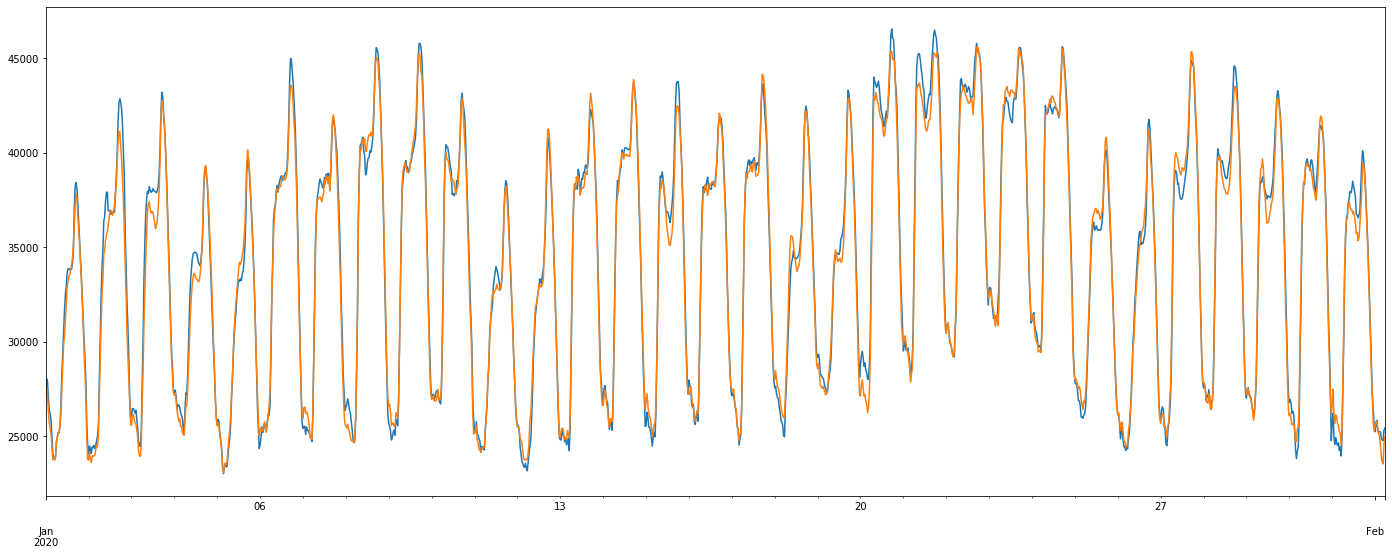

In [32]:
df_TSDF['demand'].plot(figsize=(24,9))
df_ITSDO['demand'].plot(figsize=(24,9))